In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

In [24]:
class newKL:
    def __init__(self, folder_name):
        self.labeled_KL = np.load(os.path.join(folder_name, "KL_report_js_labeled.npy"))
        self.unlabeled_KL = np.load(os.path.join(folder_name, "KL_report_js_unlabeled.npy"))
        self.epochs = np.load(os.path.join(folder_name, "epochs.npy"))
        self.target_acc_unlabel = np.load(os.path.join(folder_name, "acc_target_unlabeled_classifier_.npy"))
        self.source_acc_unlabel = np.load(os.path.join(folder_name, "acc_source_unlabeled_classifier_.npy"))
#         self.target_acc_unlabel = np.load(os.path.join(folder_name, "target_acc_unlabel.npy"))
#         self.source_acc_unlabel = np.load(os.path.join(folder_name, "source_acc_unlabel.npy"))

    def plot_label_KL(self, title, lim=None):
        plt.plot(self.epochs, self.labeled_KL)
        plt.xlabel("Training epoch")
        plt.ylabel("KL Div estimated")
        plt.title("KL Div changes \n(Labeled training data, {})".format(title))
        if lim:
            plt.ylim((lim[0], lim[1]))
    def plot_unlabel_KL(self, title, lim=None):
        plt.plot(self.epochs, self.unlabeled_KL)
        plt.xlabel("Training epoch")
        plt.ylabel("KL Div estimated")
        plt.title("KL Div changes \n(Unlabeled training data, {})".format(title))
        if lim:
            plt.ylim((lim[0], lim[1]))
    def plot_unlabel_acc(self, title, lim=None):
        plt.plot(self.epochs, self.target_acc_unlabel)
        plt.plot(self.epochs, self.source_acc_unlabel)
        plt.legend(['target', 'source'])
        plt.xlabel("Training epoch")
        plt.ylabel("Unlabeled Acc")
        plt.title("Accuracy for unlabeled data ({})".format(title))
        if lim:
            plt.ylim((lim[0], lim[1]))

In [44]:
cd ..

/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan


In [46]:
labeled_KL = np.load("gan_KL_archieve/labeled_KL.npy")
ublabeled_KL = np.load("gan_KL_archieve/unlabeled_KL.npy")
epochs = np.load("gan_KL_archieve/epochs.npy")
target_acc_unlabel = np.load("gan_KL_archieve/target_acc_unlabel.npy")
source_acc_unlabel = np.load("gan_KL_archieve/source_acc_unlabel.npy")

In [47]:

labeled_KL_1 = np.load("gan_KL_classifier_s1335_e2000_archieve/labeled_KL.npy")
ublabeled_KL_1 = np.load("gan_KL_classifier_s1335_e2000_archieve/unlabeled_KL.npy")
epochs_1 = np.load("gan_KL_classifier_s1335_e2000_archieve/epochs.npy")
target_acc_unlabel_1 = np.load("gan_KL_classifier_s1335_e2000_archieve/target_acc_unlabel.npy")
source_acc_unlabel_1 = np.load("gan_KL_classifier_s1335_e2000_archieve/source_acc_unlabel.npy")

In [73]:
# load naive adaptation
naive_source_acc = np.load("naive-adaptation/acc_source_unlabeled_classifier_.npy")
naive_target_acc = np.load("naive-adaptation/acc_target_unlabeled_classifier_.npy")
epochs_naive = np.load("naive-adaptation/epochs.npy")

In [52]:
e = np.concatenate([epochs, epochs_1[1:]])
lab_KL = np.concatenate([labeled_KL, labeled_KL_1[1:]])
ublab_KL = np.concatenate([ublabeled_KL, ublabeled_KL_1[1:]])
target_acc_u = np.concatenate([target_acc_unlabel, target_acc_unlabel_1[1:]])
source_acc_u = np.concatenate([source_acc_unlabel, source_acc_unlabel_1[1:]])

Text(0.5, 1.0, 'KL Div changes (Labeled training data)')

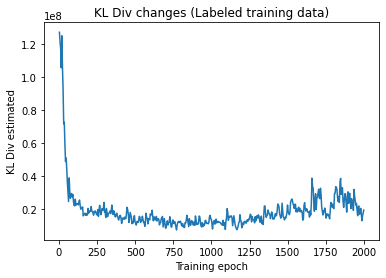

In [53]:
plt.plot(e, lab_KL)
plt.xlabel("Training epoch")
plt.ylabel("KL Div estimated")
plt.title("KL Div changes (Labeled training data)")

Text(0.5, 1.0, 'KL Div changes (Unlabeled test data)')

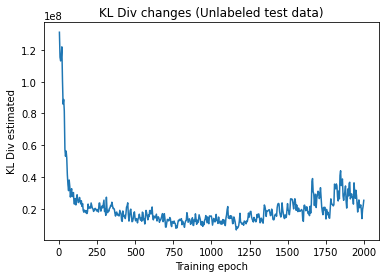

In [54]:
plt.plot(e, ublab_KL)
plt.xlabel("Training epoch")
plt.ylabel("KL Div estimated")
plt.title("KL Div changes (Unlabeled test data)")

(0.04, 0.5)

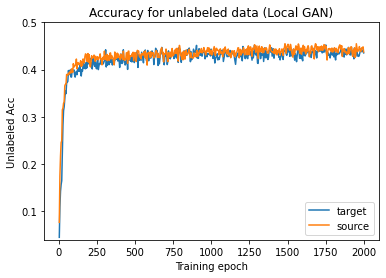

In [95]:
plt.plot(e, target_acc_u)
plt.plot(e, source_acc_u)
plt.legend(['target', 'source'])
plt.xlabel("Training epoch")
plt.ylabel("Unlabeled Acc")
plt.title("Accuracy for unlabeled data (Local GAN)")
plt.ylim((0.04, 0.5))

In [70]:
# load naive adaptation
naive_source_acc = np.load("naive-adaptation/acc_source_unlabeled_classifier_.npy")
naive_target_acc = np.load("naive-adaptation/acc_target_unlabeled_classifier_.npy")

Text(0.5, 1.0, 'Acc local GAN v.s. naive adaptation (Source unlabeled data)')

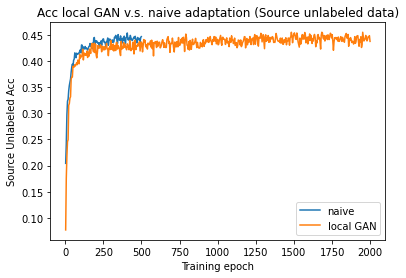

In [83]:
plt.plot(epochs_naive, naive_source_acc)
plt.plot(e, source_acc_u)
plt.xlabel("Training epoch")
plt.ylabel("Source Unlabeled Acc")
plt.legend(['naive', 'local GAN'])
plt.title("Acc local GAN v.s. naive adaptation (Source unlabeled data)")

In [90]:
print("source naive: ",naive_source_acc[-50:].mean())
print("source local GAN: ", source_acc_u[-300:].mean())

source naive:  0.44197668997669
source local GAN:  0.43977078477078474


In [ ]:
source_acc_u

Text(0.5, 1.0, 'Acc local GAN v.s. naive adaptation (Target unlabeled data)')

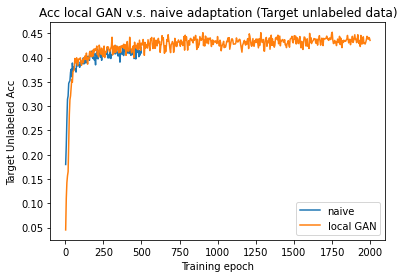

In [82]:
plt.plot(epochs_naive, naive_target_acc)
plt.plot(e, target_acc_u)
plt.xlabel("Training epoch")
plt.ylabel("Target Unlabeled Acc")
plt.legend(['naive', 'local GAN'])
plt.title("Acc local GAN v.s. naive adaptation (Target unlabeled data)")

In [89]:
print("target naive: ",naive_target_acc[-50:].mean())
print("target local GAN: ", target_acc_u[-300:].mean())

target naive:  0.4105174825174825
target local GAN:  0.4334685314685314


Text(0.5, 1.0, 'Acc local GAN v.s. naive adaptation (Target unlabeled data)')

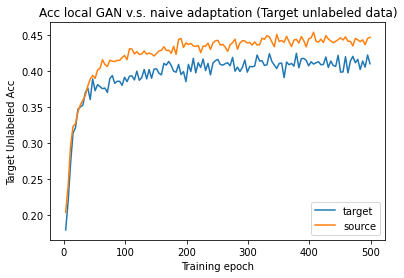

In [91]:
plt.plot(epochs_naive, naive_target_acc)
plt.plot(epochs_naive, naive_source_acc)
plt.xlabel("Training epoch")
plt.ylabel("Target Unlabeled Acc")
plt.legend(['target', 'source'])
plt.title("Acc local GAN v.s. naive adaptation (Target unlabeled data)")

# Global KL

In [3]:
g_labeled_KL = np.load("gan_global_KL_classifier/labeled_KL.npy")
g_ublabeled_KL = np.load("gan_global_KL_classifier/unlabeled_KL.npy")
g_epochs = np.load("gan_global_KL_classifier/epochs.npy")
g_target_acc_unlabel = np.load("gan_global_KL_classifier/target_acc_unlabel.npy")
g_source_acc_unlabel = np.load("gan_global_KL_classifier/source_acc_unlabel.npy")

Text(0.5, 1.0, 'KL Div changes \n(Labeled training data, Global KL)')

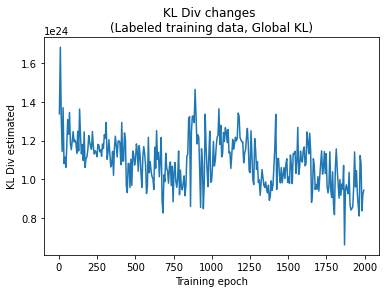

In [8]:
plt.plot(g_epochs, g_labeled_KL)
plt.xlabel("Training epoch")
plt.ylabel("KL Div estimated")
plt.title("KL Div changes \n(Labeled training data, Global KL)")

Text(0.5, 1.0, 'KL Div changes \n(unLabeled testing data, Global KL)')

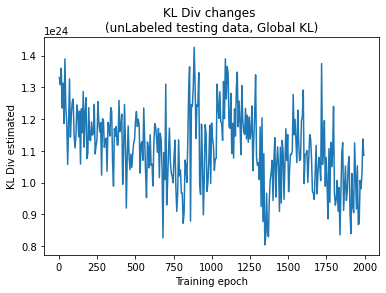

In [7]:
plt.plot(g_epochs, g_ublabeled_KL)
plt.xlabel("Training epoch")
plt.ylabel("KL Div estimated")
plt.title("KL Div changes \n(unLabeled testing data, Global KL)")

(0.1, 0.5)

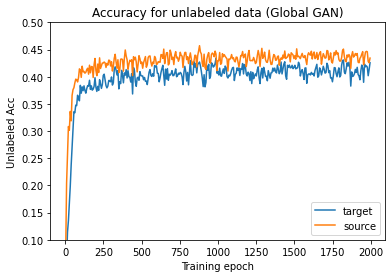

In [10]:
plt.plot(g_epochs, g_target_acc_unlabel)
plt.plot(g_epochs, g_source_acc_unlabel)
plt.legend(['target', 'source'])
plt.xlabel("Training epoch")
plt.ylabel("Unlabeled Acc")
plt.title("Accuracy for unlabeled data (Global GAN)")
plt.ylim((0.1, 0.5))

# Re-run naive adaptation for lbl0.7

In [ ]:
g_labeled_KL = np.load("gan_global_KL_classifier/labeled_KL.npy")
g_ublabeled_KL = np.load("gan_global_KL_classifier/unlabeled_KL.npy")
g_epochs = np.load("gan_global_KL_classifier/epochs.npy")
g_target_acc_unlabel = np.load("gan_global_KL_classifier/target_acc_unlabel.npy")
g_source_acc_unlabel = np.load("gan_global_KL_classifier/source_acc_unlabel.npy")

In [1]:
class KL:
    def __init__(self, folder_name):
        self.labeled_KL = np.load(os.path.join(folder_name, "labeled_KL.npy"))
        self.unlabeled_KL = np.load(os.path.join(folder_name, "unlabeled_KL.npy"))
        self.epochs = np.load(os.path.join(folder_name, "epochs.npy"))
        self.target_acc_unlabel = np.load(os.path.join(folder_name, "target_acc_unlabel.npy"))
        self.source_acc_unlabel = np.load(os.path.join(folder_name, "source_acc_unlabel.npy"))
    def plot_label_KL(self, title):
        plt.plot(self.epochs, self.labeled_KL)
        plt.xlabel("Training epoch")
        plt.ylabel("KL Div estimated")
        plt.title("KL Div changes \n(Labeled training data, {})".format(title))
    def plot_unlabel_KL(self, title):
        plt.plot(self.epochs, self.unlabeled_KL)
        plt.xlabel("Training epoch")
        plt.ylabel("KL Div estimated")
        plt.title("KL Div changes \n(Unlabeled training data, {})".format(title))
    def plot_unlabel_acc(self, title, lim=None):
        plt.plot(self.epochs, self.target_acc_unlabel)
        plt.plot(self.epochs, self.source_acc_unlabel)
        plt.legend(['target', 'source'])
        plt.xlabel("Training epoch")
        plt.ylabel("Unlabeled Acc")
        plt.title("Accuracy for unlabeled data ({})".format(title))
        if lim:
            plt.ylim((lim[0], lim[1]))

In [23]:
naive_7 = KL("naive_adaptation_lbl_0.7_no_centerloss_KL_classifier")

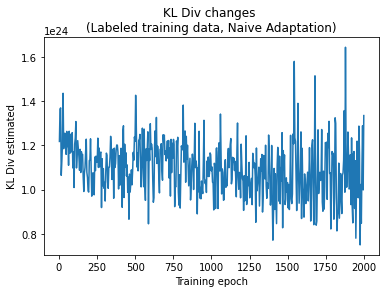

In [24]:
naive_7.plot_label_KL("Naive Adaptation")

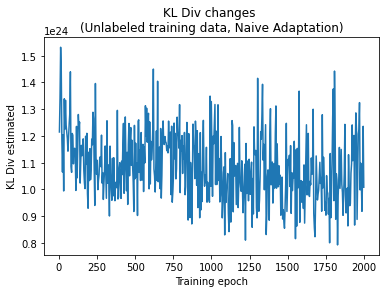

In [25]:
naive_7.plot_unlabel_KL("Naive Adaptation")

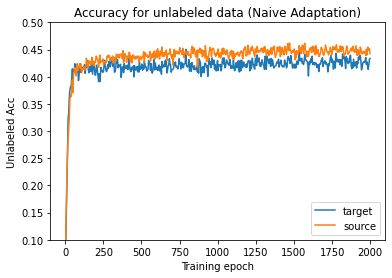

In [27]:
naive_7.plot_unlabel_acc("Naive Adaptation", lim=(0.1,0.5))

# Lbl_percent 0.3

## Local GAN

In [29]:
lbl3_local = KL("local_gan_lbl_0.3_crit0.16_sclass_1_KL_classifier")

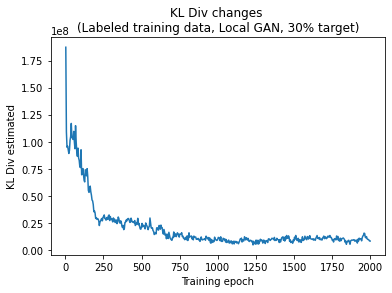

In [36]:
lbl3_local.plot_label_KL("Local GAN, 30% target")

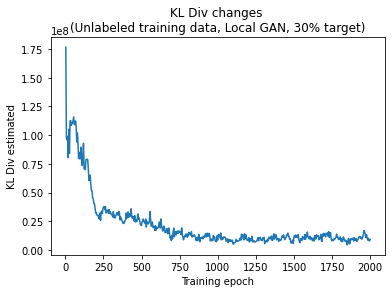

In [37]:
lbl3_local.plot_unlabel_KL("Local GAN, 30% target")

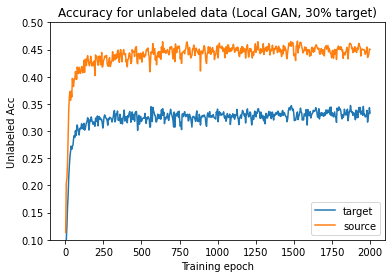

In [39]:
lbl3_local.plot_unlabel_acc("Local GAN, 30% target", lim=(0.1, 0.5))

## global GAN

In [41]:
lbl3_global = KL("global_gan_lbl_0.3_sclass_1_KL_classifier")

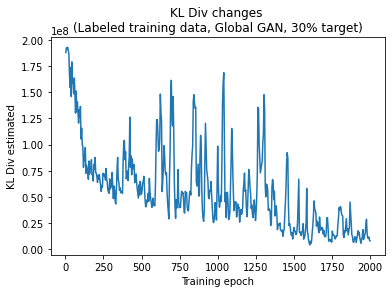

In [43]:
lbl3_global.plot_label_KL("Global GAN, 30% target")

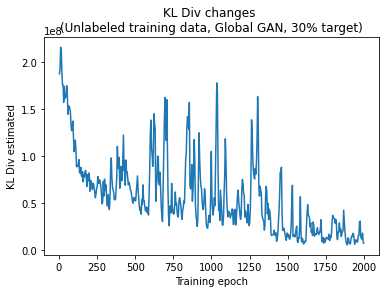

In [44]:
lbl3_global.plot_unlabel_KL("Global GAN, 30% target")

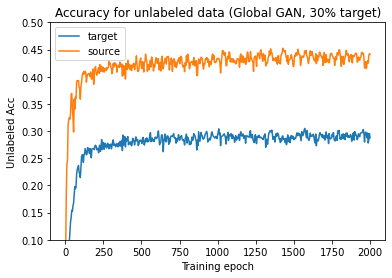

In [45]:
lbl3_global.plot_unlabel_acc("Global GAN, 30% target", lim=(0.1, 0.5))

## Naive adaptation

In [48]:
naive_3 = KL("naive_adaptation_lbl_0.3_nocenter_sclass_1_KL_classifier")

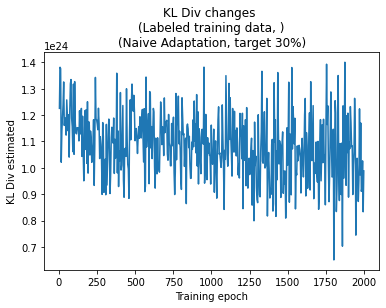

In [51]:
naive_3.plot_label_KL(")\n(Naive Adaptation, target 30%")

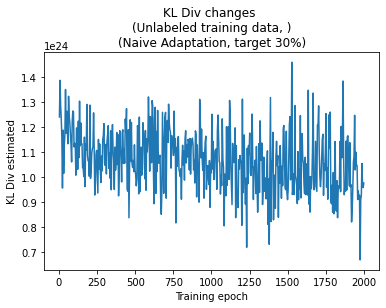

In [52]:
naive_3.plot_unlabel_KL(")\n(Naive Adaptation, target 30%")

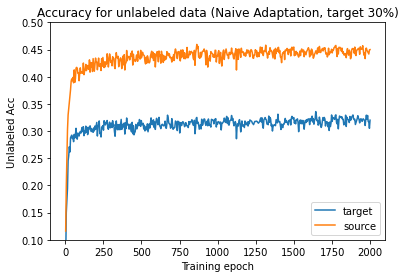

In [55]:
naive_3.plot_unlabel_acc("Naive Adaptation, target 30%", lim=(0.1, 0.5))

# NEW KL measurement for lbl 0.7

## data cleaning

In [14]:
datapath = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan/0.3_final/0.3_final/local_gan_lbl_0.3_crit0.16_sclass_1_newKL_JS_classifier"
inter = np.load(datapath + "/KL_report_js_labeled.npy", allow_pickle=True)
a = [i.item() for i in inter]
np.save(datapath + "/KL_report_js_labeled.npy", a)

In [15]:
inter = np.load(datapath + "/KL_report_js_unlabeled.npy", allow_pickle=True)
a = [i.item() for i in inter]
np.save(datapath + "/KL_report_js_unlabeled.npy", a)

## Naive for lbl 0.7

In [23]:
naive_lbl7_new_folder = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan/parital/partial_results_0.7/naive_lbl7_new_JS_classifier"
naive_lbl7_new = newKL(naive_lbl7_new_folder)

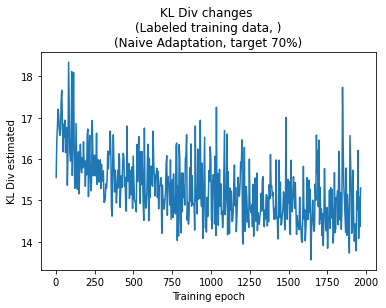

In [24]:
naive_lbl7_new.plot_label_KL(")\n(Naive Adaptation, target 70%")

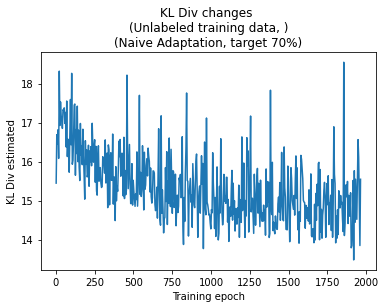

In [25]:
naive_lbl7_new.plot_unlabel_KL(")\n(Naive Adaptation, target 70%")

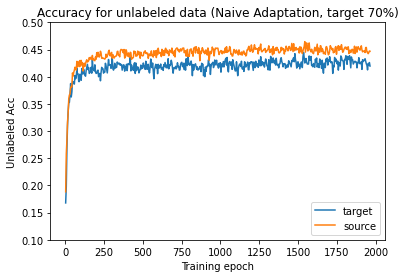

In [26]:
naive_lbl7_new.plot_unlabel_acc("Naive Adaptation, target 70%", lim=(0.1, 0.5))

## Local GAN for lbl 0.7

In [27]:
local_gan_lbl7_new_folder = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan/parital/partial_results_0.7/local_gan_lbl0.7_rerun_JS_report_KL_JS_classifier"
local_gan_lbl7_new = newKL(local_gan_lbl7_new_folder)

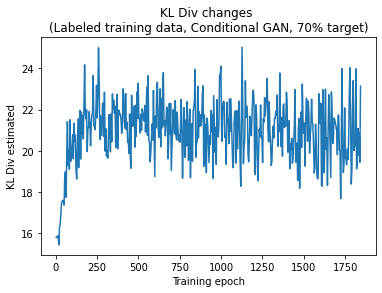

In [28]:
local_gan_lbl7_new.plot_label_KL("Conditional GAN, 70% target")

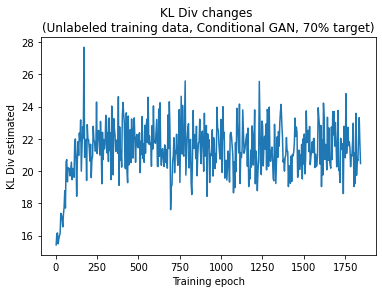

In [29]:
local_gan_lbl7_new.plot_unlabel_KL("Conditional GAN, 70% target")

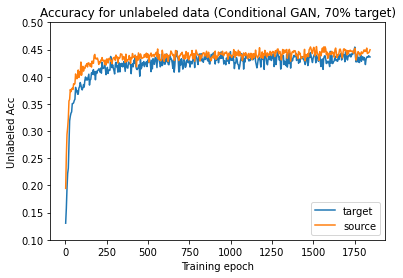

In [30]:
local_gan_lbl7_new.plot_unlabel_acc("Conditional GAN, 70% target", lim=(0.1, 0.5))

## Global GAN on lbl 0.7

In [7]:
global_gan_lbl7_new_folder = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan/parital/partial_results_0.7/global_gan_lbl0.7_newmeasure_JS_classifier"
global_gan_lbl7_new = newKL(global_gan_lbl7_new_folder)

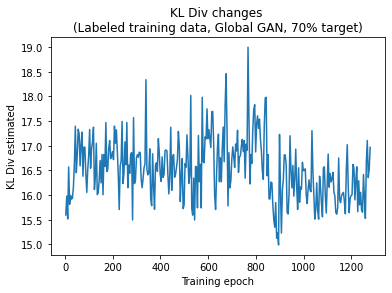

In [9]:
global_gan_lbl7_new.plot_label_KL("Global GAN, 70% target")

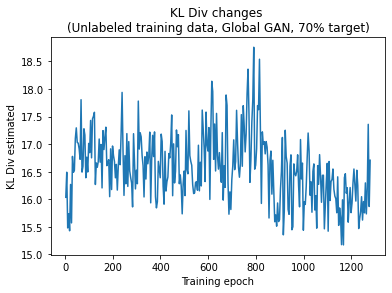

In [10]:
global_gan_lbl7_new.plot_unlabel_KL("Global GAN, 70% target")

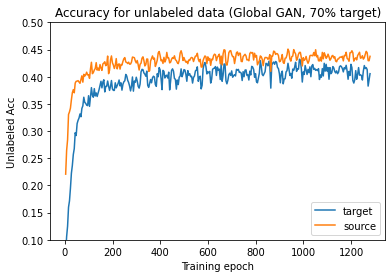

In [11]:
global_gan_lbl7_new.plot_unlabel_acc("Global GAN, 70% target", lim=(0.1, 0.5))

# New KL for lbl 0.3

## naive Adaptation

In [35]:
naive_adapt_lbl3_path = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan/0.3_final/0.3_final/naive_lbl3_new_JS_classifier"
naive_adapt_lbl3= newKL(naive_adapt_lbl3_path)

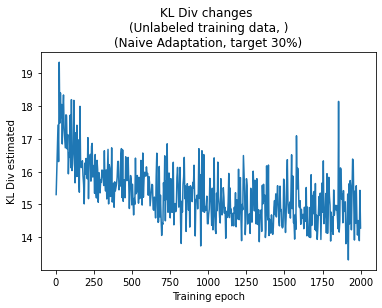

In [36]:
naive_adapt_lbl3.plot_unlabel_KL(")\n(Naive Adaptation, target 30%")

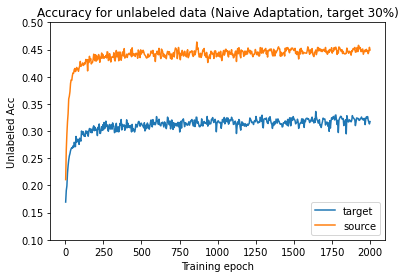

In [38]:
naive_adapt_lbl3.plot_unlabel_acc("Naive Adaptation, target 30%", lim=(0.1, 0.5))

In [39]:
global_adapt_lbl3_path = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan/0.3_final/0.3_final/global_gan_lbl_0.3_sclass_1_new_JS_classifier"
global_adapt_lbl3= newKL(global_adapt_lbl3_path)

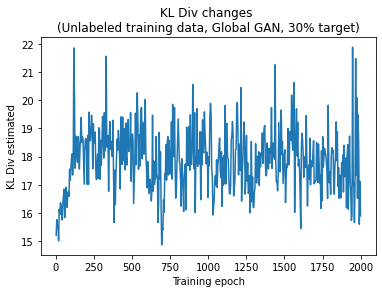

In [40]:
global_adapt_lbl3.plot_unlabel_KL("Global GAN, 30% target")

In [41]:
local_adapt_lbl3_path = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/f-gan/0.3_final/0.3_final/local_gan_lbl_0.3_crit0.16_sclass_1_newKL_JS_classifier"
local_adapt_lbl3= newKL(local_adapt_lbl3_path)

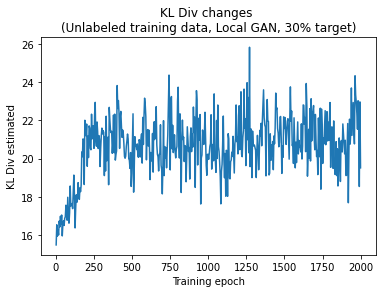

In [42]:
local_adapt_lbl3.plot_unlabel_KL("Local GAN, 30% target")

## NEW KL LOCAL KL REVISED (conditional KL)

## Naive adaptation no G

In [25]:
naive_noG_new_kl_path = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/local-f-gan/local_kl_naive_noG_0.7_JS_classifier"
naive_noG_new_kl = newKL(naive_noG_new_kl_path)


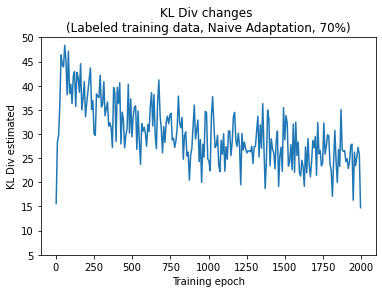

In [26]:
naive_noG_new_kl.plot_label_KL("Naive Adaptation, 70%", lim=(5,50))

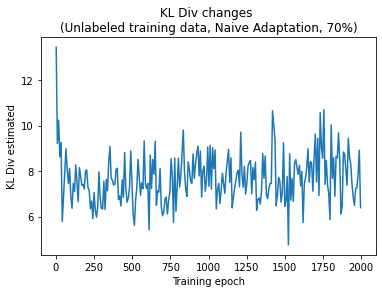

In [27]:
naive_noG_new_kl.plot_unlabel_KL("Naive Adaptation, 70%")

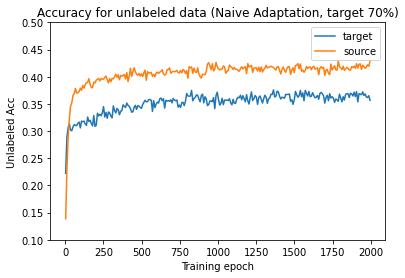

In [28]:
naive_noG_new_kl.plot_unlabel_acc("Naive Adaptation, target 70%", lim=(0.1, 0.5))

## local GAN

In [29]:
local_kl_local_gan_7_path = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/local-f-gan/newLocalKL/local_KL_local_gan_0.7_JS_classifier"
local_kl_local_gan_7 = newKL(local_kl_local_gan_7_path)

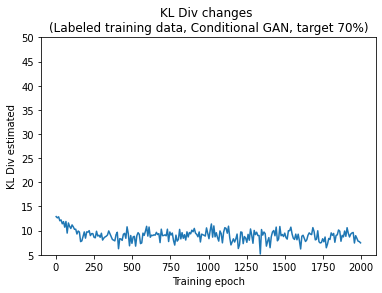

In [30]:
local_kl_local_gan_7.plot_label_KL("Conditional GAN, target 70%", lim=(5,50))

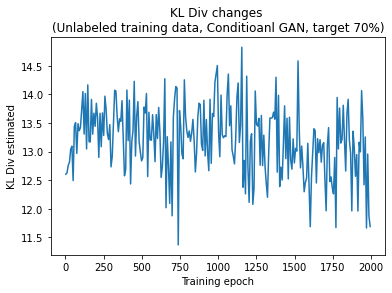

In [31]:
local_kl_local_gan_7.plot_unlabel_KL("Conditioanl GAN, target 70%")

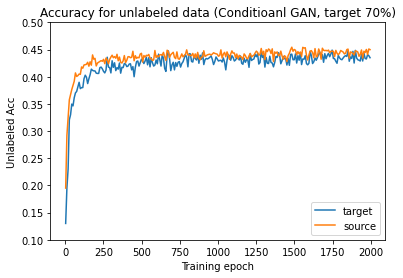

In [32]:
local_kl_local_gan_7.plot_unlabel_acc("Conditioanl GAN, target 70%", lim=(0.1, 0.5))

## global GAN

In [33]:
local_kl_global_gan_7_path = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/local-f-gan/newLocalKL/local_kl_global_gan_0.7_JS_classifier"
local_kl_global_gan_7 = newKL(local_kl_global_gan_7_path)

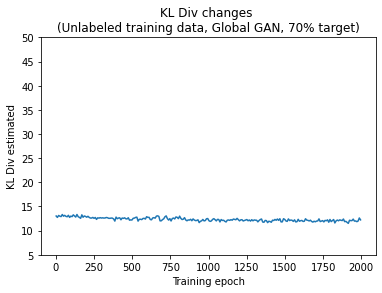

In [34]:
local_kl_global_gan_7.plot_unlabel_KL("Global GAN, 70% target", lim=(5,50))

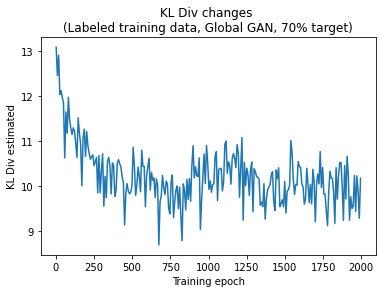

In [35]:
local_kl_global_gan_7.plot_label_KL("Global GAN, 70% target")

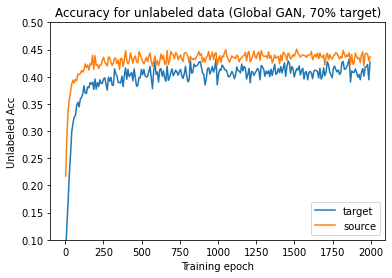

In [36]:
local_kl_global_gan_7.plot_unlabel_acc("Global GAN, 70% target", lim=(0.1, 0.5))

In [21]:


plt.plot(naive_noG_new_kl.epochs, naive_noG_new_kl.labeled_KL)
plt.plot(local_kl_global_gan_7.epochs, local_kl_global_gan_7.labeled_KL)
plt.plot(local_kl_local_gan_7.epochs, local_kl_local_gan_7.labeled_KL)

plt.legend(["Naive adaptation", "Global GAN", "Conditional GAN"])
plt.title("Conditional KL divergence estimation\n(Labeled data, target 70%)")
plt.ylim(5,50)

NameError: name 'naive_noG_new_kl' is not defined

(5.0, 50.0)

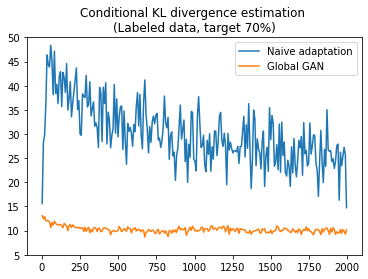

In [22]:
plt.plot(naive_noG_new_kl.epochs, naive_noG_new_kl.labeled_KL)
plt.plot(local_kl_global_gan_7.epochs, local_kl_global_gan_7.labeled_KL)

plt.legend(["Naive adaptation", "Global GAN"])
plt.title("Conditional KL divergence estimation \n(Labeled data, target 70%)")
plt.ylim(5,50)

In [23]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [24]:
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [25]:
prob_path7 = "/home/tianqinl/Code/time-series-domain-adaptation/train_related/prob_classifier_lbl_0.7_JS_classifier"
prob_7 = newKL(prob_path7)

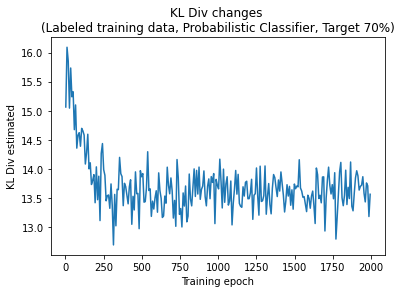

In [26]:
prob_7.plot_label_KL("Probabilistic Classifier, Target 70%")

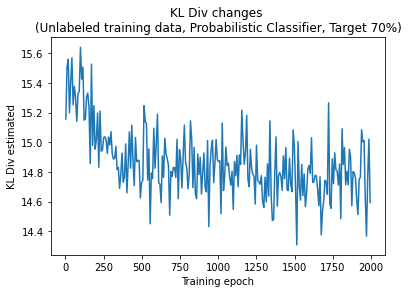

In [27]:
prob_7.plot_unlabel_KL("Probabilistic Classifier, Target 70%")

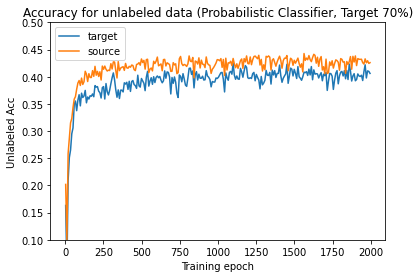

In [30]:
prob_7.plot_unlabel_acc("Probabilistic Classifier, Target 70%", lim=(0.1, 0.5))


(5.0, 50.0)

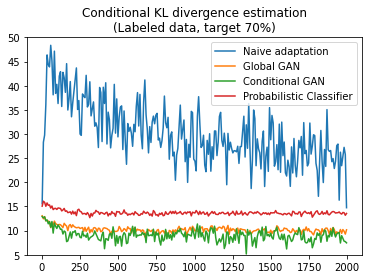

In [29]:


plt.plot(naive_noG_new_kl.epochs, naive_noG_new_kl.labeled_KL)
plt.plot(local_kl_global_gan_7.epochs, local_kl_global_gan_7.labeled_KL)
plt.plot(local_kl_local_gan_7.epochs, local_kl_local_gan_7.labeled_KL)
plt.plot(prob_7.epochs, prob_7.labeled_KL)

plt.legend(["Naive adaptation", "Global GAN", "Conditional GAN", "Probabilistic Classifier"])
plt.title("Conditional KL divergence estimation\n(Labeled data, target 70%)")
plt.ylim(5,50)